In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Omdena_Project/Crime Images/Violent_Crimes

In [ ]:
Path = '/content/drive/.shortcut-targets-by-id/188VUgFIjwg7VtKiBAxEbNVQD1UzUpuvZ/Crime Images/Violent_Crimes/Disaster Images/DisasterImages'

In [ ]:
!pip install pytesseract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.2 MB 28.3 MB/s 
  Attempting uninstall: Pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2


In [ ]:
##################### Making Essential Imports ############################
import sklearn
import os
import sys
import matplotlib.pyplot as plt
import cv2
import pytesseract
import numpy as np
import pandas as pd
import tensorflow as tf
conf = r'-- oem 2'

In [ ]:
#####################################
# Defining a skeleton for our       #
# DataFrame                         #
#####################################
DataFrame = {
    'photo_name' : [],
    'flattenPhoto' : [],
    'text' : [],
    }

In [ ]:
#######################################################################################
#      The Approach is to apply transfer learning hence using Resnet50 as my          #
#      pretrained model                                                               #
#######################################################################################
MyModel = tf.keras.models.Sequential()
MyModel.add(tf.keras.applications.ResNet50(
    include_top = False, weights='imagenet',    pooling='avg',
))

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
# freezing weights for 1st layer
MyModel.layers[0].trainable = False

In [ ]:
### Now defining dataloading Function
def LoadDataAndDoEssentials(path, h, w):

    img = cv2.imread(path)
    #DataFrame['text'].append(pytesseract.image_to_string(img, config = conf))
    img = cv2.resize(img, (h, w))
    ## Expanding image dims so this represents 1 sample
    img = img = np.expand_dims(img, 0)
    img = tf.keras.applications.resnet50.preprocess_input(img)
    extractedFeatures = MyModel.predict(img)
    extractedFeatures = np.array(extractedFeatures)
    DataFrame['flattenPhoto'].append(extractedFeatures.flatten())

In [ ]:
### with this all done lets write the iterrrative loop
def ReadAndStoreMyImages(path):

    list_ = os.listdir(path)
    for mem in list_:
        DataFrame['photo_name'].append(mem)
        imagePath = path + '/' + mem
        LoadDataAndDoEssentials(imagePath, 300, 400)

In [ ]:
### lets give the address of our Parent directory and start
ReadAndStoreMyImages(Path)

In [ ]:
######################################################
#        lets now do clustering                      #
######################################################
Training_Feature_vector = np.array(DataFrame['flattenPhoto'], dtype = 'float64')
from sklearn.cluster import AgglomerativeClustering
kmeans = AgglomerativeClustering(n_clusters = 5)
kmeans.fit(Training_Feature_vector)

AgglomerativeClustering(n_clusters=5)

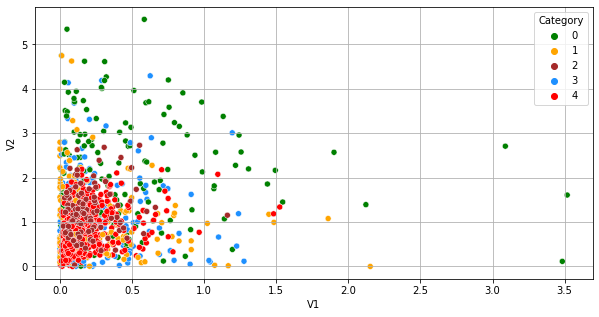

In [ ]:
## lets make this a dataFrame
import seaborn as sb
import matplotlib.pyplot as plt

dimReducedDataFrame = pd.DataFrame(Training_Feature_vector)
dimReducedDataFrame = dimReducedDataFrame.rename(columns = { 0: 'V1', 1 : 'V2',2: 'V3', 3 : 'V4',4: 'V5', 5 : 'V6',6: 'V7', 7 : 'V8',8: 'V9', 9 : 'V10'})
dimReducedDataFrame['Category'] = list(kmeans.labels_)
plt.figure(figsize = (10, 5))
sb.scatterplot(data = dimReducedDataFrame, x = 'V1', y = 'V2',
                    palette=['green','orange','brown','dodgerblue','red'],hue = 'Category')
plt.grid(True)
plt.show()